In [ ]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

y.head()


,quality
0,5
1,5
2,5
3,6
4,5


In [ ]:
X.head()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [ ]:
X.describe()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


In [ ]:
X.shape

(6497, 11)

In [ ]:
!pip install pandas
import pandas as pd
data = pd.concat([X, y], axis=1)
data = data.drop_duplicates()

# Разделение обратно на X и y
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X.shape, y.shape

((5318, 11), (5318,))

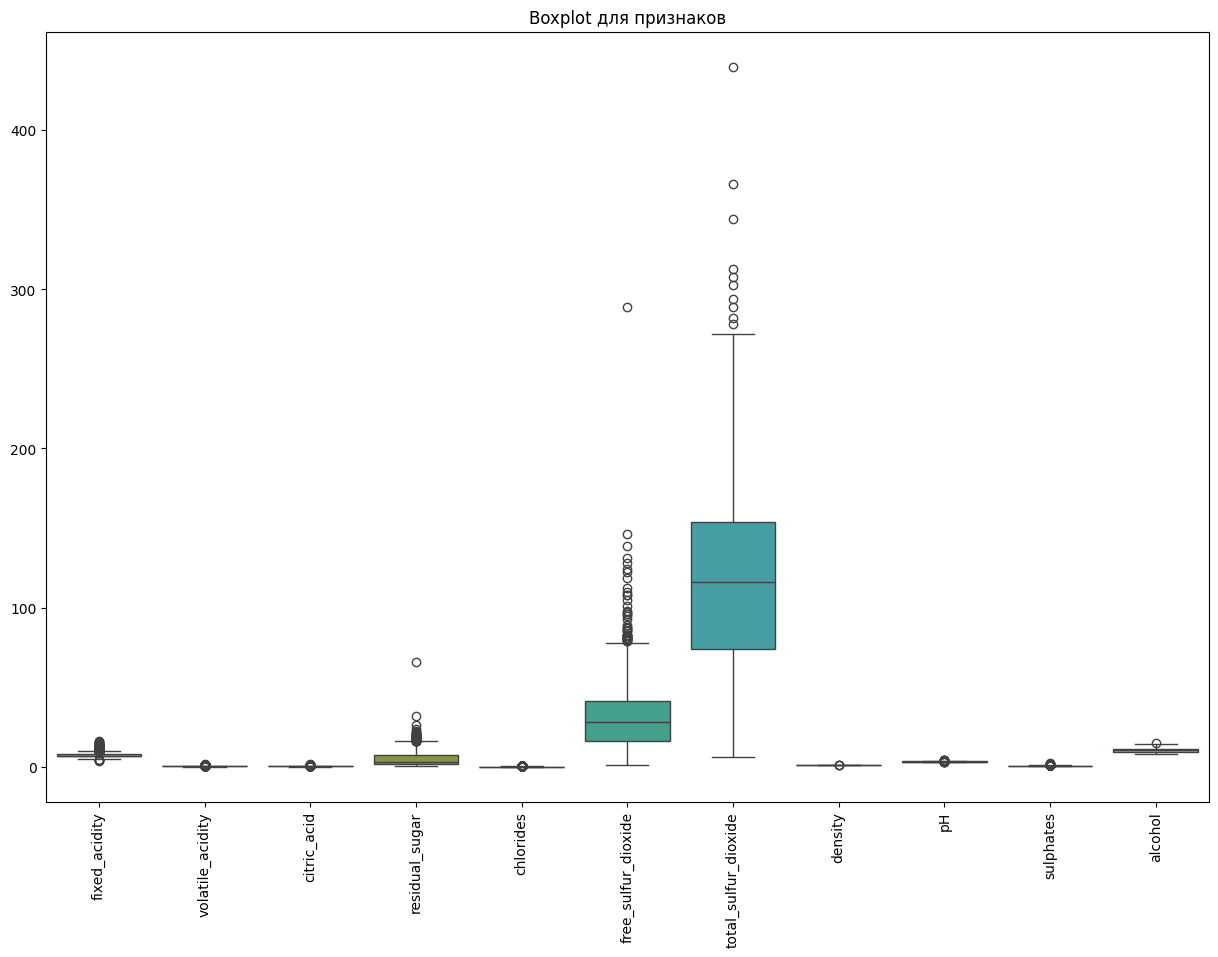

In [ ]:
!pip install matplotlib
!pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Построение boxplot для каждого столбца в X
plt.figure(figsize=(15, 10))
sns.boxplot(data=X)
plt.xticks(rotation=90)
plt.title('Boxplot для признаков')
plt.show()


In [ ]:
from scipy import stats
import numpy as np

# Вычисление Z-Score для каждого значения в X
z_scores = np.abs(stats.zscore(X))

# Определение выбросов (где Z-Score > 3)
outliers = np.where(z_scores > 3)

# Получение уникальных индексов строк с выбросами
outlier_indices = np.unique(outliers[0])

print(f"Индексы строк с выбросами: {outlier_indices}")
print(f"Количество выбросов: {len(outlier_indices)}")


Индексы строк с выбросами: [   1    3   11   12   13   15   17   35   38   39   41   42   73   75
   77   80   82   85   86   87   90   96  109  114  115  121  131  135
  141  142  150  151  159  174  176  178  182  188  202  208  211  212
  214  226  229  232  233  234  237  244  245  248  251  252  255  264
  268  269  283  285  291  294  295  296  299  302  308  311  313  314
  317  318  319  323  326  328  329  330  331  334  341  344  345  347
  350  351  355  356  357  363  366  370  375  377  378  383  384  385
  389  392  393  397  400  405  409  411  413  418  422  423  427  438
  439  441  442  444  445  448  449  450  455  463  467  468  472  473
  477  478  482  483  485  486  487  491  492  494  498  503  504  505
  506  508  510  517  518  520  521  522  531  534  536  537  538  549
  552  553  554  555  564  565  569  575  577  578  582  588  592  596
  597  598  599  602  605  606  610  615  626  627  631  632  633  637
  644  652  653  654  655  670  671  672  675  687

In [ ]:
!pip install scipy
from scipy.stats import shapiro
normality_results = {col: shapiro(X[col]) for col in X.columns}

# Print results
for col, result in normality_results.items():
    print(f"{col}: W={result.statistic}, p-value={result.pvalue}")

fixed_acidity: W=0.8866825103759766, p-value=0.0
volatile_acidity: W=0.8746716380119324, p-value=0.0
citric_acid: W=0.9646122455596924, p-value=3.2381542624305698e-34
residual_sugar: W=0.805690586566925, p-value=0.0
chlorides: W=0.6099146604537964, p-value=0.0
free_sulfur_dioxide: W=0.9330180883407593, p-value=9.949219096706201e-44
total_sulfur_dioxide: W=0.9829719066619873, p-value=8.31533448420424e-25
density: W=0.9648545384407043, p-value=4.0374539163800025e-34
pH: W=0.9913703799247742, p-value=1.723707746323316e-17
sulphates: W=0.8980547785758972, p-value=0.0
alcohol: W=0.9570046663284302, p-value=5.454029402031553e-37


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
import pandas as pd

# Предполагается, что X - это DataFrame
# Вычисление IQR для каждого столбца
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

# Определение выбросов для каждой фичи
outliers = ((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR)))

# Подсчет количества выбросов для каждой фичи
outliers_count = outliers.sum()

# Получение индексов строк с выбросами (для всех фичей)
outlier_indices = outliers.any(axis=1).index[outliers.any(axis=1)]

# Вывод результатов
print(f"Индексы строк с выбросами: {outlier_indices}")
print(f"Количество выбросов в каждой фиче: \n{outliers_count}")


Индексы строк с выбросами: Index([   0,    1,    2,    3,   13,   14,   15,   17,   19,   22,
       ...
       6392, 6393, 6407, 6412, 6414, 6417, 6440, 6444, 6446, 6485],
      dtype='int64', length=1094)
Количество выбросов в каждой фиче: 
fixed_acidity           304
volatile_acidity        279
citric_acid             143
residual_sugar          141
chlorides               237
free_sulfur_dioxide      44
total_sulfur_dioxide     10
density                   3
pH                       49
sulphates               163
alcohol                   1
dtype: int64


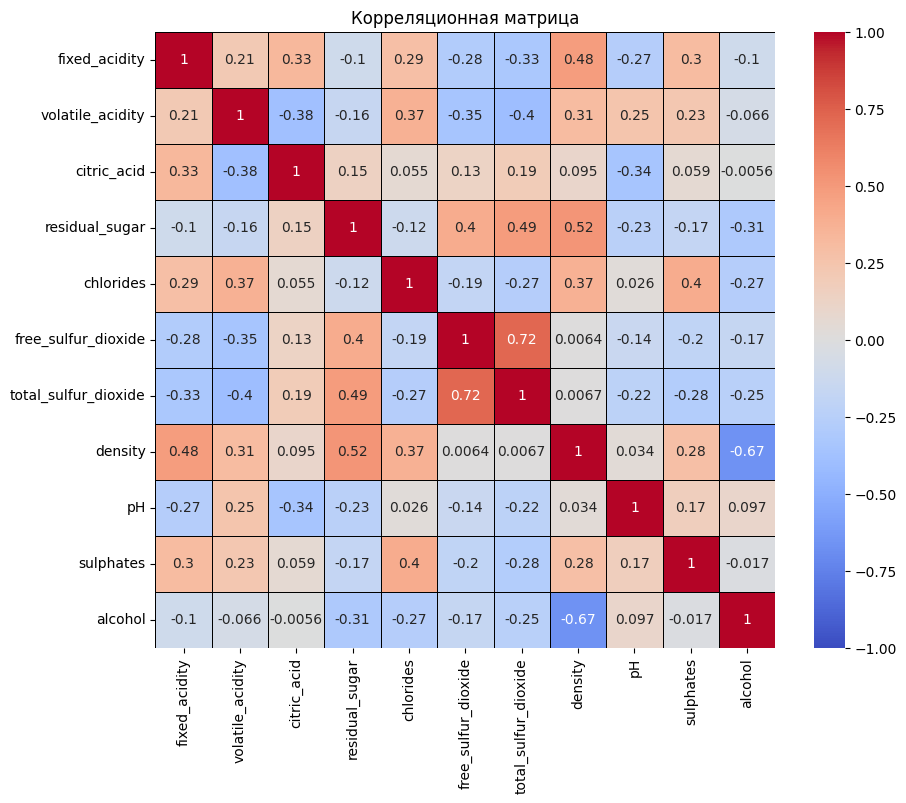

In [ ]:


# Предполагается, что X - это DataFrame
# Вычисление корреляционной матрицы
correlation_matrix = X.corr()

# Создание тепловой карты корреляционной матрицы
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, linecolor='black')

# Добавление заголовка
plt.title("Корреляционная матрица")
plt.show()



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Предполагается, что X - это DataFrame с признаками, а y - Series с таргетом
# Объединение признаков и таргета в один DataFrame
df = X.copy()
df['target'] = y

# Вычисление корреляционной матрицы
correlation_matrix = df.corr()

# Получение корреляции всех признаков с таргетом
target_correlation = correlation_matrix['target'].drop('target')

# Вывод корреляции признаков с таргетом
print("Корреляция признаков с таргетом:")
print(target_correlation)




Корреляция признаков с таргетом:
fixed_acidity          -0.080190
volatile_acidity       -0.265354
citric_acid             0.097926
residual_sugar         -0.056824
chlorides              -0.201960
free_sulfur_dioxide     0.054199
total_sulfur_dioxide   -0.050183
density                -0.326301
pH                      0.039789
sulphates               0.042040
alcohol                 0.469216
Name: target, dtype: float64


In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


# Предполагается, что X и y - это ваши данные и целевая переменная
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Список моделей и их гиперпараметров для Grid Search с автоматическим подбором
models = {
    'LinearRegression': (LinearRegression(), {}),
    'Ridge': (Ridge(), {'alpha': [0.1, 1.0, 10.0]}),
    'Lasso': (Lasso(), {'alpha': [0.01, 0.1, 1.0, 10.0]}),
    'ElasticNet': (ElasticNet(), {'alpha': [0.01, 0.1, 1.0, 10.0], 'l1_ratio': [0.1, 0.5, 0.9]}),
    'DecisionTreeRegressor': (DecisionTreeRegressor(), {'max_depth': [3, 5, 10, None]}),
    'RandomForestRegressor': (RandomForestRegressor(), {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10, None]}),
    'GradientBoostingRegressor': (GradientBoostingRegressor(), {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}),
}

# Функция для оценки модели с кросс-валидацией и подбором гиперпараметров
def evaluate_model_with_search(model, param_grid, X, y):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X, y)

    best_model = grid_search.best_estimator_
    scores_mse = cross_val_score(best_model, X, y, cv=5, scoring='neg_mean_squared_error')
    scores_r2 = cross_val_score(best_model, X, y, cv=5, scoring='r2')

    mean_mse = -scores_mse.mean()  # переводим обратно в положительное значение
    mean_r2 = scores_r2.mean()

    return mean_mse, mean_r2, best_model, grid_search.best_params_

# Перебор всех моделей и оценка их производительности с автоматическим подбором гиперпараметров
results = {}
best_models = {}

for model_name, (model, param_grid) in models.items():
    print(f"Evaluating {model_name}...")

    mse_score, r2_score, best_model, best_params = evaluate_model_with_search(model, param_grid, X_train, y_train)
    results[model_name] = {'MSE': mse_score, 'R²': r2_score}
    best_models[model_name] = best_model

# Вывод результатов
print("\nРезультаты оценки моделей с автоматическим подбором гиперпараметров:")
for model_name, scores in results.items():
    print(f"Модель: {model_name}")
    print(f"Средняя MSE: {scores['MSE']:.4f}")
    print(f"Средний R²: {scores['R²']:.4f}")
    print(f"Лучшие гиперпараметры: {best_models[model_name].get_params()}")
    print("------------------------")


Evaluating LinearRegression...
Evaluating Ridge...
Evaluating Lasso...
Evaluating ElasticNet...
Evaluating DecisionTreeRegressor...
Evaluating RandomForestRegressor...
Evaluating GradientBoostingRegressor...

Результаты оценки моделей с автоматическим подбором гиперпараметров:
Модель: LinearRegression
Средняя MSE: 0.5462
Средний R²: 0.2978
Лучшие гиперпараметры: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
------------------------
Модель: Ridge
Средняя MSE: 0.5478
Средний R²: 0.2956
Лучшие гиперпараметры: {'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.0001}
------------------------
Модель: Lasso
Средняя MSE: 0.5607
Средний R²: 0.2793
Лучшие гиперпараметры: {'alpha': 0.01, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}
------------------

Важности признаков:
1. Признак alcohol: 0.2586
2. Признак volatile_acidity: 0.1140
3. Признак free_sulfur_dioxide: 0.0955
4. Признак sulphates: 0.0813
5. Признак total_sulfur_dioxide: 0.0760
6. Признак pH: 0.0705
7. Признак chlorides: 0.0647
8. Признак residual_sugar: 0.0618
9. Признак citric_acid: 0.0607
10. Признак fixed_acidity: 0.0587
11. Признак density: 0.0582


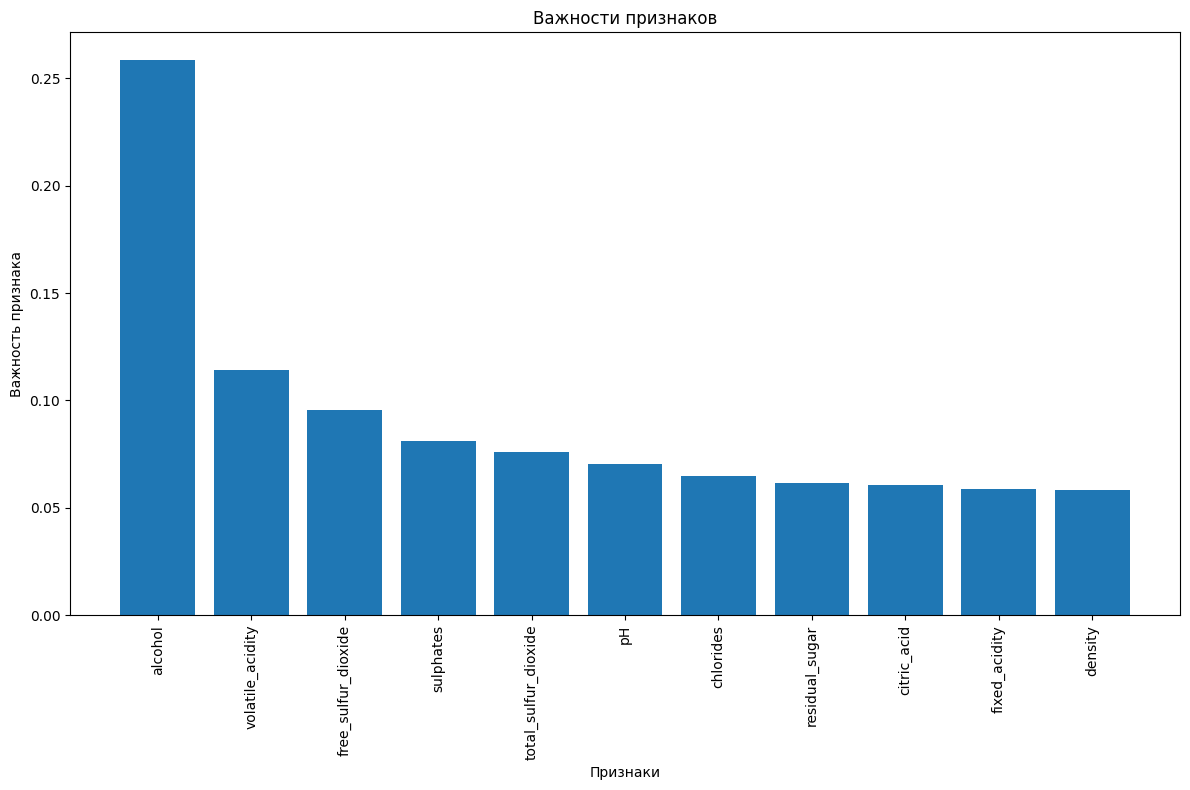

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Используем лучшие гиперпараметры для RandomForestRegressor
best_model_rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    max_features=1.0,
    random_state=42,
    bootstrap=True,
    ccp_alpha=0.0,
    criterion='squared_error',
    max_leaf_nodes=None,
    max_samples=None,
    min_impurity_decrease=0.0,
    min_samples_leaf=1,
    min_samples_split=2,
    min_weight_fraction_leaf=0.0,
    n_jobs=None,
    oob_score=False,
    verbose=0,
    warm_start=False
)

# Обучаем модель на всех тренировочных данных
best_model_rf.fit(X_train, y_train)

# Получаем важности признаков
importances = best_model_rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Печатаем важности признаков
print("Важности признаков:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. Признак {X_train.columns[indices[f]]}: {importances[indices[f]]:.4f}")

# Визуализация важности признаков
plt.figure(figsize=(12, 8))
plt.title("Важности признаков")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlabel("Признаки")
plt.ylabel("Важность признака")
plt.tight_layout()
plt.show()


Валидационная MSE: 0.4734
Валидационный R²: 0.3906
Тестовая MSE: 0.4663
Тестовый R²: 0.3564


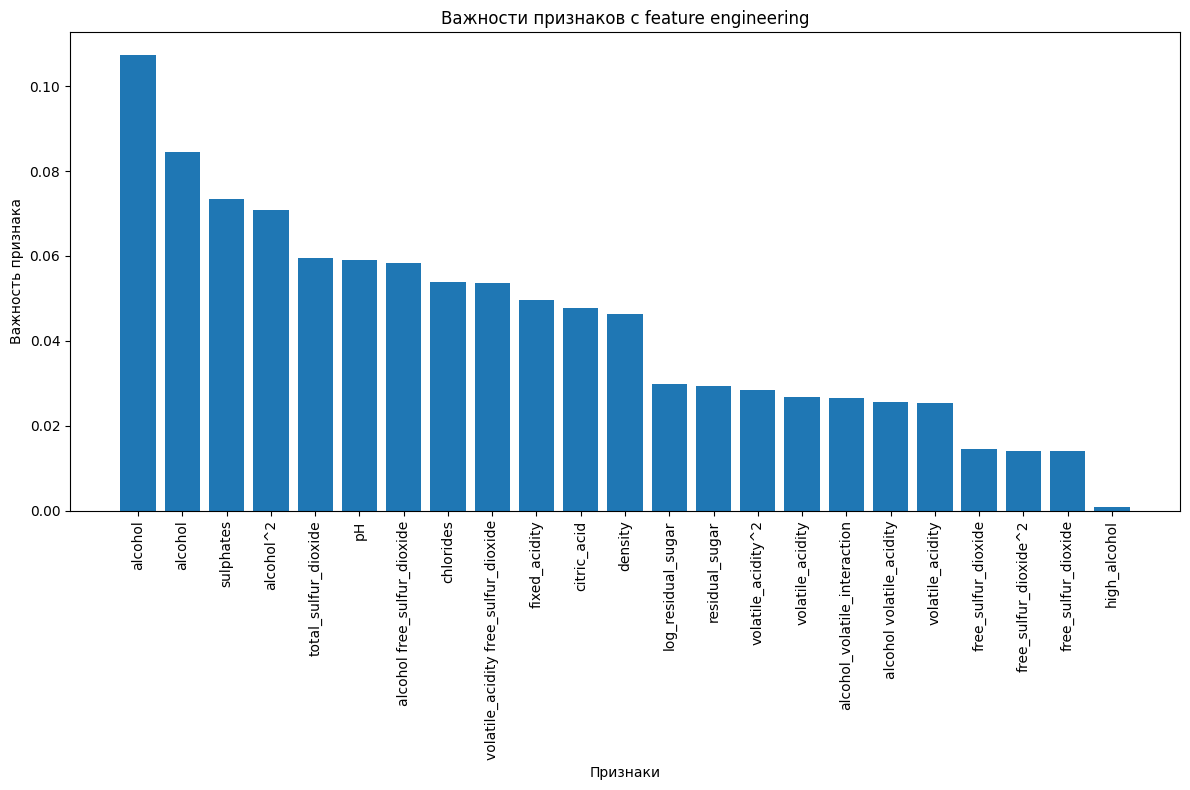

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Предполагается, что X и y - это ваши данные и целевая переменная
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Полиномиальные признаки
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train[['alcohol', 'volatile_acidity', 'free_sulfur_dioxide']])
X_val_poly = poly.transform(X_val[['alcohol', 'volatile_acidity', 'free_sulfur_dioxide']])
X_test_poly = poly.transform(X_test[['alcohol', 'volatile_acidity', 'free_sulfur_dioxide']])

# Взаимодействие признаков
X_train['alcohol_volatile_interaction'] = X_train['alcohol'] * X_train['volatile_acidity']
X_val['alcohol_volatile_interaction'] = X_val['alcohol'] * X_val['volatile_acidity']
X_test['alcohol_volatile_interaction'] = X_test['alcohol'] * X_test['volatile_acidity']

# Логарифмическое преобразование
X_train['log_residual_sugar'] = np.log1p(X_train['residual_sugar'])
X_val['log_residual_sugar'] = np.log1p(X_val['residual_sugar'])
X_test['log_residual_sugar'] = np.log1p(X_test['residual_sugar'])

# Бинаризация признаков
X_train['high_alcohol'] = (X_train['alcohol'] > 10).astype(int)
X_val['high_alcohol'] = (X_val['alcohol'] > 10).astype(int)
X_test['high_alcohol'] = (X_test['alcohol'] > 10).astype(int)



# Объединение всех новых признаков в один DataFrame
X_train_new = np.hstack([X_train, X_train_poly])
X_val_new = np.hstack([X_val, X_val_poly])
X_test_new = np.hstack([X_test, X_test_poly])

# Настройка гиперпараметров
param_grid = {
    'n_estimators': [200],
    'max_features': [1.0],
    'bootstrap': [True],
    'max_depth': [None],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

# Создание модели и подбор гиперпараметров
model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_new, y_train)

# Лучшая модель
best_model_rf = grid_search.best_estimator_

# Оценка модели на валидационном наборе
y_val_pred = best_model_rf.predict(X_val_new)
val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

print(f"Валидационная MSE: {val_mse:.4f}")
print(f"Валидационный R²: {val_r2:.4f}")

# Оценка модели на тестовом наборе
y_test_pred = best_model_rf.predict(X_test_new)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Тестовая MSE: {test_mse:.4f}")
print(f"Тестовый R²: {test_r2:.4f}")

# Важности признаков
importances = best_model_rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Создание списка имен признаков
feature_names = list(X_train.columns) + poly.get_feature_names_out(['alcohol', 'volatile_acidity', 'free_sulfur_dioxide']).tolist()

# Визуализация важностей признаков
plt.figure(figsize=(12, 8))
plt.title("Важности признаков с feature engineering")
plt.bar(range(X_train_new.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train_new.shape[1]), np.array(feature_names)[indices], rotation=90)
plt.xlabel("Признаки")
plt.ylabel("Важность признака")
plt.tight_layout()
plt.show()


Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Лучший набор гиперпараметров: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 50, 'bootstrap': True}
Валидационная MSE: 0.4722
Валидационный R²: 0.3922
Тестовая MSE: 0.4656
Тестовый R²: 0.3574


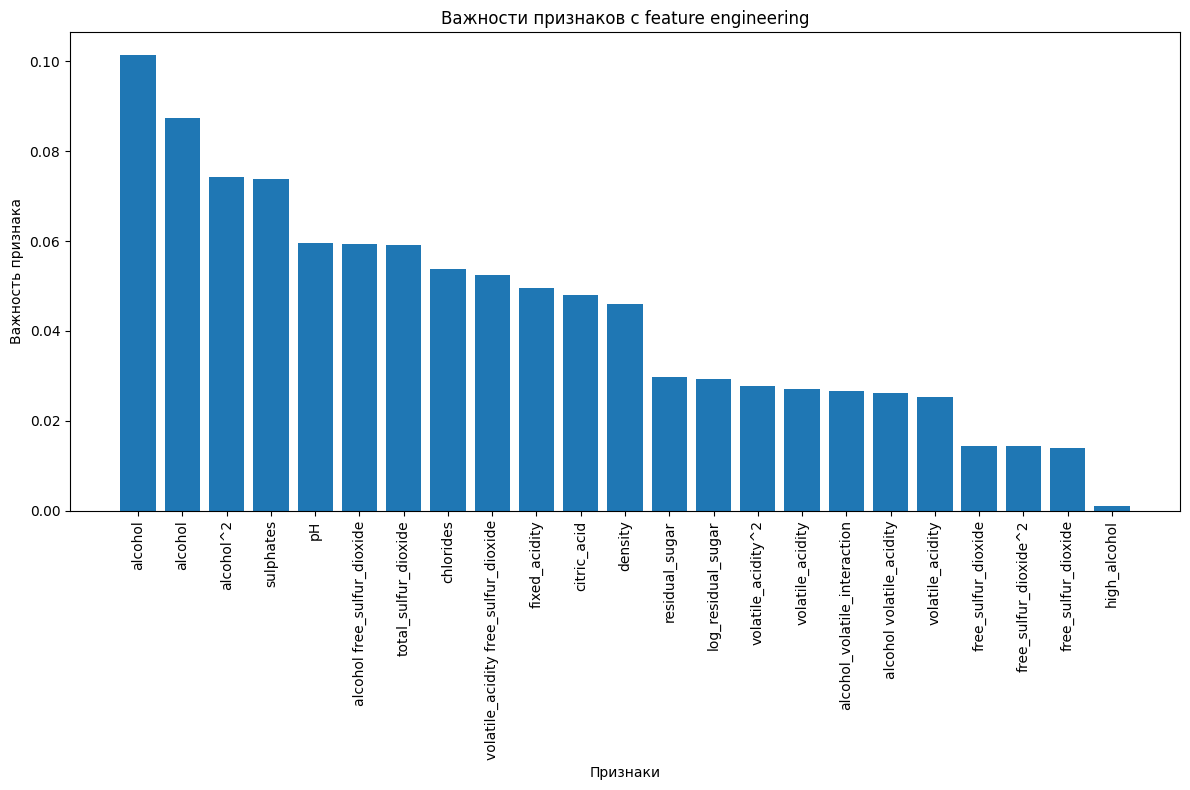

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Диапазон гиперпараметров для подбора
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Создание модели и подбор гиперпараметров с RandomizedSearchCV
model = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist,
                                   n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

random_search.fit(X_train_new, y_train)

# Лучшая модель
best_model_rf = random_search.best_estimator_

# Вывод лучшего набора гиперпараметров
print(f"Лучший набор гиперпараметров: {random_search.best_params_}")

# Оценка модели на валидационном наборе
y_val_pred = best_model_rf.predict(X_val_new)
val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

print(f"Валидационная MSE: {val_mse:.4f}")
print(f"Валидационный R²: {val_r2:.4f}")

# Оценка модели на тестовом наборе
y_test_pred = best_model_rf.predict(X_test_new)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Тестовая MSE: {test_mse:.4f}")
print(f"Тестовый R²: {test_r2:.4f}")

# Важности признаков
importances = best_model_rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Создание списка имен признаков
feature_names = list(X_train.columns) + poly.get_feature_names_out(['alcohol', 'volatile_acidity', 'free_sulfur_dioxide']).tolist()

# Визуализация важностей признаков
plt.figure(figsize=(12, 8))
plt.title("Важности признаков с feature engineering")
plt.bar(range(X_train_new.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train_new.shape[1]), np.array(feature_names)[indices], rotation=90)
plt.xlabel("Признаки")
plt.ylabel("Важность признака")
plt.tight_layout()
plt.show()
